# Import modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import LabelBinarizer
pd.plotting.register_matplotlib_converters()
import seaborn as sns 
%matplotlib inline
print('Setup completed!!')

Setup completed!!


# Load dataset

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\kosap\\company.csv')
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# Data Visualization

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

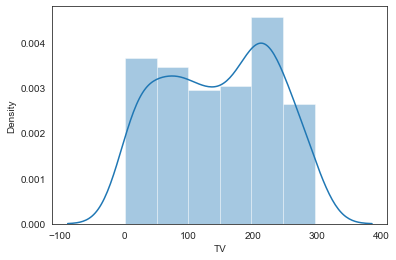

In [9]:
sns.distplot(data['TV'])

<AxesSubplot:xlabel='TV', ylabel='Count'>

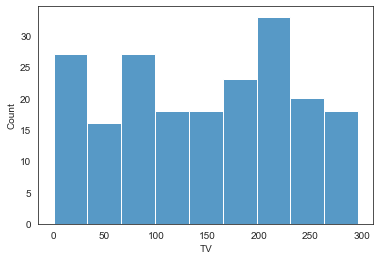

In [10]:
sns.histplot(data['TV'])

<AxesSubplot:xlabel='Radio', ylabel='Count'>

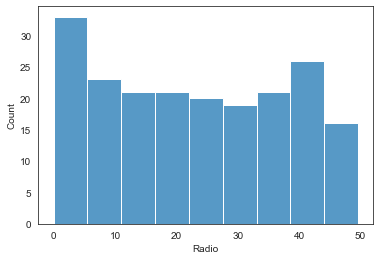

In [11]:
sns.histplot(data['Radio'])

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

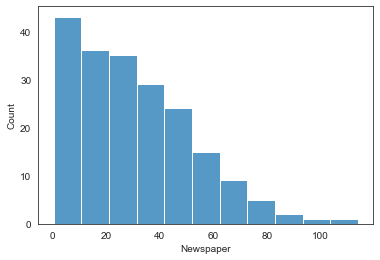

In [12]:
sns.histplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

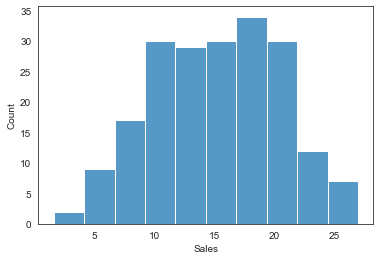

In [13]:
sns.histplot(data['Sales'])

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

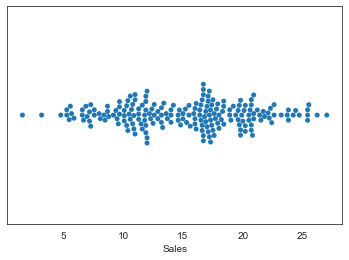

In [15]:
sns.swarmplot(data['Sales'])

In [18]:
df_uniques = data.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

# Train and Test

In [21]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [25]:
lb , le = LabelBinarizer(), LabelEncoder()
for col in data: 
    data[col] = le.fit_transform(data[col])


In [26]:
X = data
y = data['Sales']
X.head()

,TV,Radio,Newspaper,Sales
0,153,131,159,106
1,32,136,124,28
2,12,156,160,40
3,98,142,149,66
4,112,41,148,80


In [27]:
cols = X.columns

In [28]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [29]:
X = pd.DataFrame(X, columns=[cols])

In [31]:
X.head()

,TV,Radio,Newspaper,Sales
0,0.809524,0.789157,0.929825,0.883333
1,0.169312,0.819277,0.725146,0.233333
2,0.063492,0.939759,0.935673,0.333333
3,0.518519,0.855422,0.871345,0.550000
4,0.592593,0.246988,0.865497,0.666667


<AxesSubplot:xlabel='None', ylabel='None'>

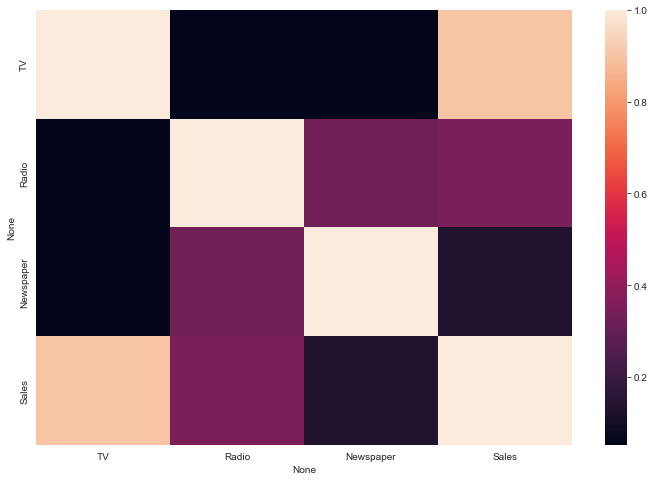

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X.corr())

 # KMeans

In [34]:
from sklearn.cluster import KMeans
# Kmeans model with k=4: 
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

C:\Users\USER\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [35]:
# Get the inertia: 
kmeans.inertia_

24.728795105251404

In [38]:
pred = kmeans.predict(X)

Text(0.5, 1.0, 'Making a clustering when k=4')

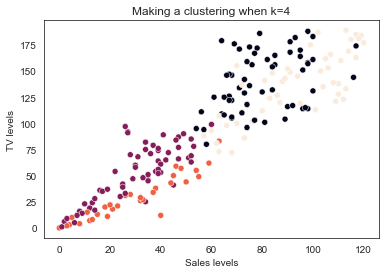

In [41]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = pred
sns.scatterplot(x=data_with_clusters['Sales'], y=data_with_clusters['TV'],c=data_with_clusters['clusters'])
plt.xlabel('Sales levels')
plt.ylabel('TV levels')
plt.title('Making a clustering when k=4')

In [44]:
k_means = KMeans(n_clusters=6, random_state=0)
k_means.fit(X)

C:\Users\USER\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [45]:
# Get the inertia : 
k_means.inertia_

17.876852649745434

In [46]:
pred_2 = k_means.predict(X)

Text(0.5, 1.0, 'Making a clustering when k=6')

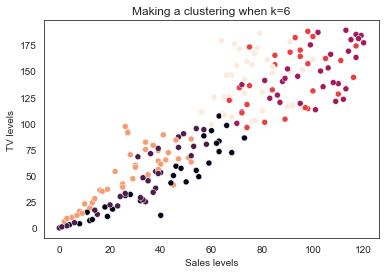

In [47]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = pred_2
sns.scatterplot(x=data_with_clusters['Sales'], y=data_with_clusters['TV'],c=data_with_clusters['clusters'])
plt.xlabel('Sales levels')
plt.ylabel('TV levels')
plt.title('Making a clustering when k=6')

# Random Forest Classifier

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
X_train[0]

array([ 1.51927546, -0.87240254, -1.3200075 ,  0.91277951])

In [55]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = classifier.predict(X_test)

In [58]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


0.1

In [59]:
classifier.score(X_test, y_test)

0.1

# Decission Tree predictor

In [61]:
#Decission Tree predictor
# Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13)
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted

array([39, 73, 73, 39, 73, 39, 73, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 73, 73, 39, 39, 73, 39, 39, 73, 39, 39, 39, 39, 39, 73, 39,
       39, 73, 39, 73, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 73, 39, 39], dtype=int64)